<a href="https://colab.research.google.com/github/Gnanapreetham2808/Google_Stock_Prediction/blob/main/DL_PROJECT_MODEL_01(ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ARIMA (AutoRegressive Integrated Moving Average)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
# Load the dataset
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')

# Extracting the 'Open' prices as training data
train_data = dataset_train['Open']
real_stock_price = dataset_test.iloc[:, 1:2].values


In [ ]:
print(dataset_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


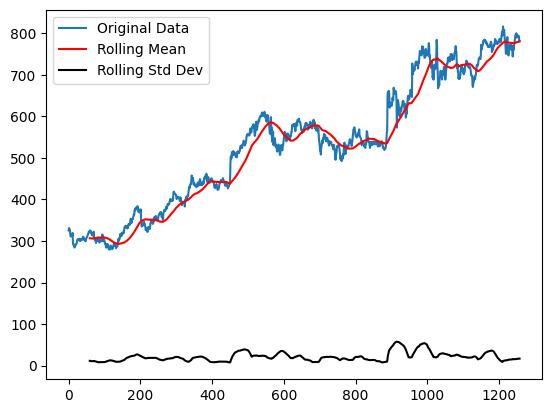

In [ ]:
# Visualizing the rolling mean and variance to check stationarity
#check for stationarity
rolling_mean = train_data.rolling(window=60).mean()
rolling_std = train_data.rolling(window=60).std()

plt.plot(train_data, label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.legend()
plt.show()

# Differencing to make the time series stationary
train_diff = train_data.diff().dropna()


In [ ]:
# Building the ARIMA model (manual tuning for better performance)
#CO-Varinace Matrix
model = ARIMA(train_data, order=(5,1,3))  # You can try adjusting p, d, q values here
arima_model = model.fit()
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1258
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -4452.007
Date:                Sun, 27 Oct 2024   AIC                           8922.014
Time:                        17:22:24   BIC                           8968.242
Sample:                             0   HQIC                          8939.388
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3935      0.069      5.741      0.000       0.259       0.528
ar.L2         -0.5066      0.041    -12.399      0.000      -0.587      -0.426
ar.L3          0.8526      0.070     12.103      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from math import sqrt  # Import sqrt for calculating RMSE
from sklearn.metrics import mean_squared_error

# Concatenating the train and test data for continuous prediction
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# Forecasting based on the ARIMA model
predicted_stock_price = arima_model.forecast(steps=len(dataset_test))

# Reshaping the predicted stock price
predicted_stock_price = np.array(predicted_stock_price).reshape(-1,1)

# Calculating RMSE as a measure of accuracy
rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 28.63674775739505


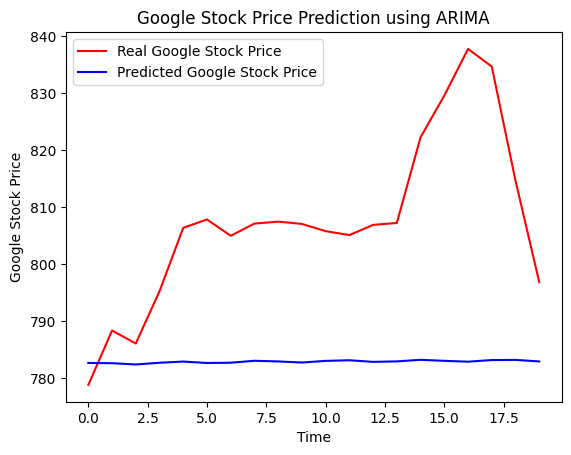

In [ ]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_true = real_stock_price
y_pred = predicted_stock_price

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 820.0633221206705
Root Mean Squared Error (RMSE): 28.63674775739505
Mean Absolute Error (MAE): 25.01986228884129
R-squared (R2): -2.7731877594719596
